# Obtain the data

In [1]:
# Dataset found here: https://www.kaggle.com/giripujar/hr-analytics/data

In [3]:
# Import neccessary modules for data manipulation and visual representation
%matplotlib inline
import pandas as pd
import seaborn as sns

In [4]:
# Read analytics csv file and store dataset into dataframe df
df = pd.read_csv('datasets_11142_15488_HR_comma_sep.csv', index_col=None)


# Data Wrangling

In [5]:
# Check if any missing values in dataset
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
# Get quick overview of dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Labeling

In [7]:
# Rename columns for better understanding
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Feature conversion

In [8]:
# Convert department and salary to numeric because some functions won't work with strings
df.replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


# Feature arrangement

In [9]:
# Move reponse variable "turnover" to front of the table -- easier to split into training/testing sets
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


# Outlier detection

In [10]:
# describe function checks if any extreme values in data by examining min/max rows. There seem to be no irregularities.
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


# Exploratory analysis

In [12]:
# Statistical overview -- dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [13]:
# Check type of features
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department               int64
salary                   int64
dtype: object

In [14]:
# Appears that ~76% of employees stayed and 24% of employees left. When performing cross validation, important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [15]:
# Overview of summary -- on average, employees who left had a lower satisfaction level of -20%, worked 8hrs more per month, had a lower salary and a lower promotion rate
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
turnover,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


In [16]:
# Display statistical overview of employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


# Correlation matrix and heatmap

Highly correlated features:
1. (+) projectCount, averageMonthlyHours, evaluation
2. (-) turnover, satisfaction, salary

From the heatmap, there appears to be strong positive(+) correlation between projectCount, averageMonthlyHours, and evaluation, which could mean employees who spent more hours and did more projects were evaluated highly. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. For the negative(-) relationships, turnover, satisfaction, and salary are highly correlated. We can presume people tend to leave a company when they are less satisfied and are lowly paid.

AttributeError: module 'seaborn' has no attribute 'plt'

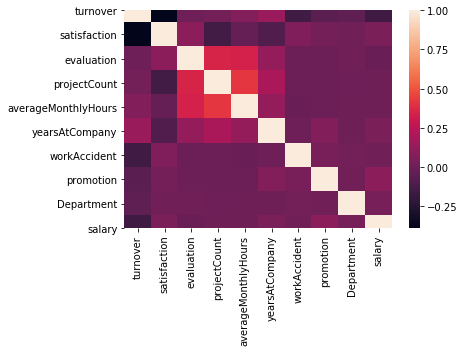

In [17]:
# Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

# Turnover vs department

Top three departments are support, technical, and sales. Most departments have similar turnover rates, but management has the lowest. This could mean people with higher positions tend to stay.

The management department has the highest salary ratio and lowest turnover rate.

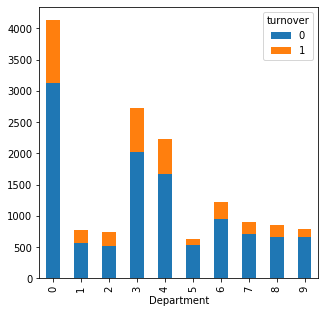

In [33]:
# Dept vs turnover
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

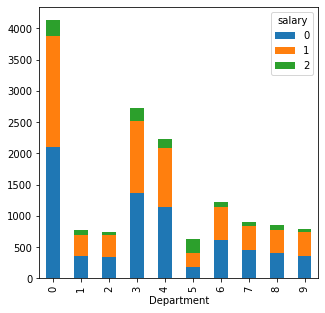

In [34]:
# Dept vs salary
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["salary"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

# Turnover vs salary

Almost all employees who left had low to medium salary levels. Hardly anyone with high salaries left.

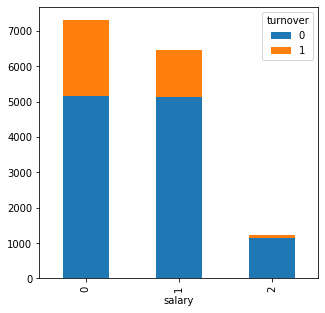

In [35]:
clarity_color_table = pd.crosstab(index=df["salary"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

# Turnover vs promotion

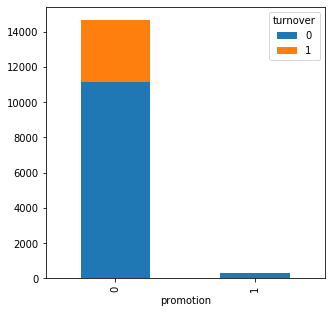

In [36]:
clarity_color_table = pd.crosstab(index=df["promotion"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

# Turnover vs years at company

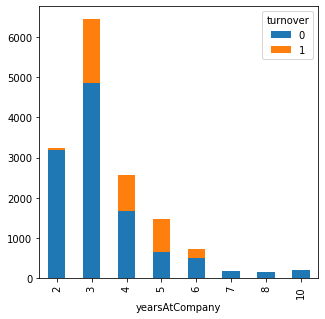

In [37]:
clarity_color_table = pd.crosstab(index=df["yearsAtCompany"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


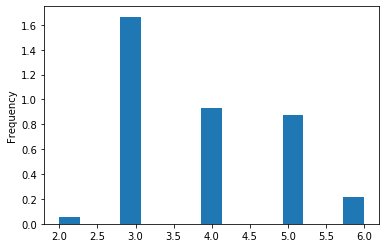

In [38]:
df.loc[(df['turnover'] == 1),'yearsAtCompany'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

# Turnover vs project count

Over half of employees with only 2 projects left the company. Same for employees with project counts of 6-7. Perhaps we can deduce that employees with project counts of 2 or less do not have enough work or are not highly valued, which compels them to leave the company. And conversely employees with 6+ projects are overworked.

A majority of employes who left only had two projects. There is also an increase in turnover as the number of projects increase. 3 projects looks to be the sweet spot.

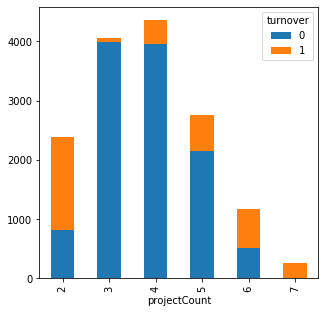

In [39]:
clarity_color_table = pd.crosstab(index=df["projectCount"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

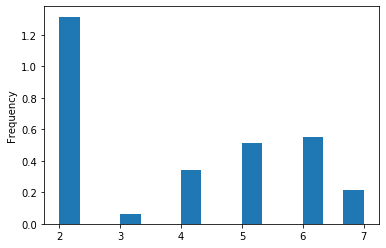

In [40]:
# Histogram showing frequency of people who left the company and their number of projects
df.loc[(df['turnover'] == 1),'projectCount'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

# Turnover vs evaluation

There is a biomodal distrubtion for turnover. Employees who performed well or not well left the company. Those who stay are within 0.6-0.8

Text(0.5, 1.0, 'Last evaluation')

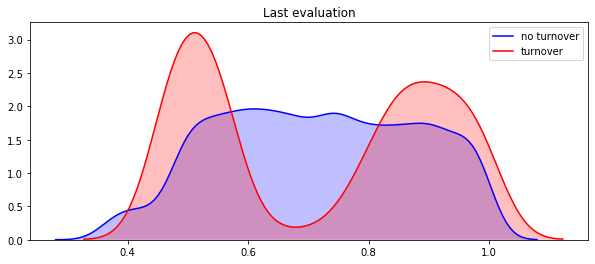

In [48]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

# Turnover vs average monthly hours

Another bimodal distrubtion for employees with turnover. Employees with less hours of work (~150hours or less) and employees with too many hours of work (~250 or more) left the company.

Text(0.5, 1.0, 'Average monthly hours worked')

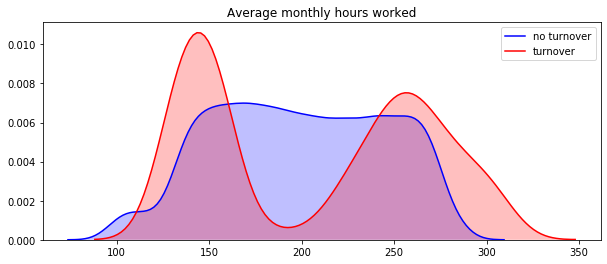

In [49]:
# KDEPlot -- Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

# ProjectCount vs average monthly hours

An interesting observation about the boxplot graph is the difference in averageMonthlyHours between people with and without turnover. Employees who did not turnover saw consistent averageMonthlyHours despite the increase in projects. In contrast, employees who did have turnover saw an increase in averageMonthlyHours with the increase in projects. So employees who left worked more hours than employees who didn't, even with the same project count

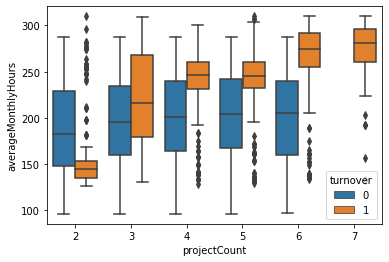

In [50]:
# ProjectCount vs averageMonthlyHours boxplot
# on average employees who stayed worked about 200hours/month while those with turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

# ProjectCount vs evaluation

This graph looks very similar to the graph above. Within the turnover group, there is an increase in evaluation for employees who did more projects. But within the non-turnover group, employees saw a consistent evaluation score despite the increase in project counts (again).
So employees who left had on average a higher evaluation than employees who did not leave, even with an increase in project count. This goes against the general perception that employees with lower evaluations tend to be more likely to leave a company.

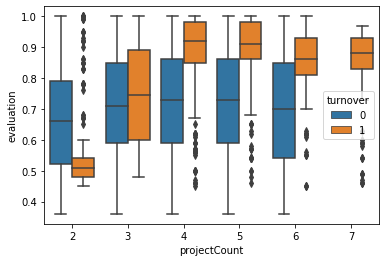

In [51]:
# ProjectCount vs evaluation
# employees who did not leave had an average evaluation of around 70% even with different projectCounts
# There is a heavy skew in employees with turnover -- drastically changes after 3 projectCounts
# employees with two projects and a horrible evaluation left, and employees with > 3 projects and very high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

# ProjectCount vs evaluation vs satisfaction 

On the bottom left corner of the matrix (Evaluation vs satisfaction) we can see three distinct clusters (possible feature engineering):

Cluster 1: Satisfaction below 0.2 and evaluations greater than 0.75, which could be a good indication that employees who left were good at their job but did not like it. This cluster could signify employees who are overworked. 

Cluster 2: Satisfaction between ~0.35~0.45 and evaluations below ~0.58. This could indicate employees who were poorly evaluated and also did not enjoy their job. This cluster could signify under-performers. 

Cluster 3: Satisfaction between 0.7~1.0 and evaluations greater than 0.8, which could indicate the ideal employees who were evaluated highly and enjoyed their job. This cluster could signify employees who left because they found better opportunities. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22b00910>,
      dtype=object)

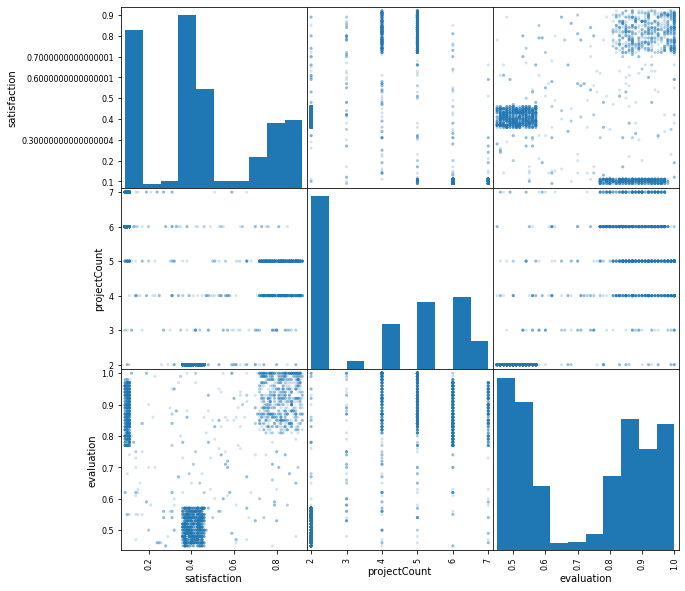

In [56]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# scatter matrix for employees with turnover
fig, ax = plt.subplots(figsize=(10,10))
turnoverDF = df[df['turnover']==1]
scatter_matrix(turnoverDF[['satisfaction','projectCount','evaluation']], alpha=0.2, diagonal='hist', ax=ax)

# Data modeling

In [57]:
# Train-Test split
from sklearn.model_selection import train_test_split
label = df.pop('turnover')
data_train, data_test, label_train, label_test = train_test_split(df, label, test_size = 0.2, random_state = 15)

In [58]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(data_train, label_train)
lg_score_train = lg.score(data_train, label_train)
print("Training score: ",lg_score_train)
lg_score_test = lg.score(data_test, label_test)
print("Testing score: ",lg_score_test)

Training score:  0.7905658804900408
Testing score:  0.7883333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(data_train, label_train)
svm_score_train = svm.score(data_train, label_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(data_test, label_test)
print("Testing score: ",svm_score_test)

Training score:  0.7838986582215185
Testing score:  0.7846666666666666


In [60]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, label_train)
knn_score_train = knn.score(data_train, label_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(data_test, label_test)
print("Testing score: ",knn_score_test)

Training score:  0.9544128677389783
Testing score:  0.9406666666666667


In [61]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  1.0
Testing score:  0.9916666666666667


# Data interpretation

Employees leave when working ~6hours/day (underworked) and ~10hours/day (overworked)
Most employees who left had low-medium salaries
Most employees who left did not get promoted
Most employees who left had evaluation scores below 0.6 and above 0.8
As project count increased, so did the turnover rate. Most employees who left had 2 projects. All employees with 7 projects left. Employees with 3 projects had the least turnovers.

Project count, average monthly hours, and evaluation had a positive correlation, thus the more employees worked the higher evaluations they received.
Turnover, satisfaction, and salary had a negative correlation, thereby lower satisfaction and lower salary resulted in a higher turnover rate.

We can observe that satisfaction affects turnover the most, and that there were very few promotions. We also see that employees who left the company worked more hours than employees who stayed, although they had the same number of projects. And lastly, employees who left had on average higher evaluations than employees who stayed (even with an increase in project count), which contradicts the general principle that employees with lower evaluations tend to leave more.